In [4]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder



In [5]:
import pandas as pd
file_path = 'banklimpio.csv'
X_cleaned1 = pd.read_csv(file_path)
X_cleaned1 = pd.read_csv(file_path, sep=',')  
X_cleaned1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40879,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
40880,73,2850,17,300,1,40,8,0,0,1,...,0,0,0,0,0,0,0,1,0,1
40881,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
40882,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


MODELO 1: VARIABLE DE RESPUESTA PRODUCTIVIDAD ACTUAL

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

X= X_cleaned1.drop(columns='y_yes')
# Separar variables predictoras (X) y la variable objetivo (y)
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [7]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.14994108111535104
MSE:  0.06427232787873938
RMSE:  0.25351987669360243


In [8]:

# usar MSE - error cuadrático medio
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
mse_scores = - scores
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_absolute_error')

mae_scores = -scores

#print("MAE scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

rmse_scores = np.sqrt(mse_scores)

print("Mean RMSE:", rmse_scores.mean())

print("Mean MSE:", mse_scores.mean())

Mean MAE: 0.1508129114056401
Mean RMSE: 0.2137529633013515
Mean MSE: 0.06448691809901538


MODELO 1: OLS VARIABLE DE RESPUESTA PRODUCTIVIDAD ACTUAL

In [9]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


y = X_cleaned1['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión usando mínimos cuadrados ordinarios (OLS)
md = sm.OLS(y_train, X_train).fit()

# Resumen de resultados
print(md.summary())

# Extraer coeficientes y p-valores en un DataFrame
results = pd.DataFrame({
    'Variable': md.params.index,
    'Coeficiente': md.params.values,
    'p-valor': md.pvalues.values
})
# Filtrar variables significativas (usualmente p-valor < 0.01)
significativas = results[results['p-valor'] < 0.1]
no_significativas = results[results['p-valor'] >= 0.1]

# Mostrar resultados
print("Variables Significativas (p-valor < 1%):")
print(significativas)

print("\nVariables No Significativas (p-valor >= 1%):")
print(no_significativas)

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     267.2
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:06:04   Log-Likelihood:                -850.19
No. Observations:               30663   AIC:                             1756.
Df Residuals:                   30635   BIC:                             1990.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3865    

MODELO 1: OLS SOLO CON VARIABLES SIGNIFICATIVAS

In [10]:
X_significativas = X_cleaned1[significativas['Variable'].values[1:]]  # [1:] para excluir 'const'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_significativas, X_test_significativas, y_train_significativas, y_test_significativas = train_test_split(X_significativas, y, random_state=1)

# Agregar la constante para el modelo OLS
X_train_significativas = sm.add_constant(X_train_significativas)
X_test_significativas = sm.add_constant(X_test_significativas)

# Ajustar el modelo OLS
md_significativas = sm.OLS(y_train_significativas, X_train_significativas).fit()

# Realizar predicciones sobre el conjunto de prueba
y_pred_significativas = md_significativas.predict(X_test_significativas)

# Calcular MAE, MSE y RMSE
mae = mean_absolute_error(y_test_significativas, y_pred_significativas)
mse = mean_squared_error(y_test_significativas, y_pred_significativas)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(md_significativas.summary())

MAE: 0.14957905633990146
MSE: 0.0641210669582661
RMSE: 0.253221379346741
                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     343.4
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:06:04   Log-Likelihood:                -851.89
No. Observations:               30663   AIC:                             1748.
Df Residuals:                   30641   BIC:                             1931.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Modelo Redes neuronales

In [11]:
train = X_cleaned1.sample(frac=0.8, random_state=100)
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
38259,47,551,29,124,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
28725,45,4629,2,285,2,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19099,47,3681,14,101,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
22421,54,1162,17,37,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
37021,66,3,6,550,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [12]:
test = X_cleaned1.drop(train.index)
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
9,43,593,5,55,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
27,52,113,5,127,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
28,46,-246,5,255,2,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
40,50,49,5,180,2,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
44,58,-364,5,355,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [13]:
print(train.shape)
print(test.shape)

(32707, 28)
(8177, 28)


In [14]:
sys.setrecursionlimit(999)

In [15]:
X_cleaned1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_unknown',
       'y_yes'],
      dtype='object')

In [16]:
X_cleaned1.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        int64
job_management         int64
job_retired            int64
job_services           int64
job_technician         int64
marital_married        int64
marital_single         int64
education_secondary    int64
education_tertiary     int64
housing_yes            int64
loan_yes               int64
contact_telephone      int64
contact_unknown        int64
month_aug              int64
month_feb              int64
month_jul              int64
month_jun              int64
month_may              int64
month_nov              int64
poutcome_unknown       int64
y_yes                  int64
dtype: object

In [17]:
# Definir las columnas categóricas y continuas
categorical_features = []

# Encontrar las columnas dummificadas
for col in X_cleaned1.columns:
    if "_" in col and col != "y_yes":  
        categorical_features.append(col)


continuous_features = [col for col in X_cleaned1.columns if col not in categorical_features and col != "y_yes"]

# Mostrar las listas
print("Categorical dummies:", categorical_features)
print("Continuous features:", continuous_features)

Categorical dummies: ['job_blue-collar', 'job_management', 'job_retired', 'job_services', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_unknown']
Continuous features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [18]:
X = X_cleaned1.drop(columns=['y_yes'])

# Definir la variable objetivo
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_X))


In [19]:
# Iniciar el cronómetro
start_time = time.time()

# Definir el modelo de red neuronal profunda con capas densas y Dropout
linear_model_1 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Capa de salida para regresión
])

# Compilar el modelo
linear_model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)

# Entrenamiento del modelo
history_1 = linear_model_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

# Medir el tiempo de entrenamiento
elapsed_time_1 = time.time() - start_time

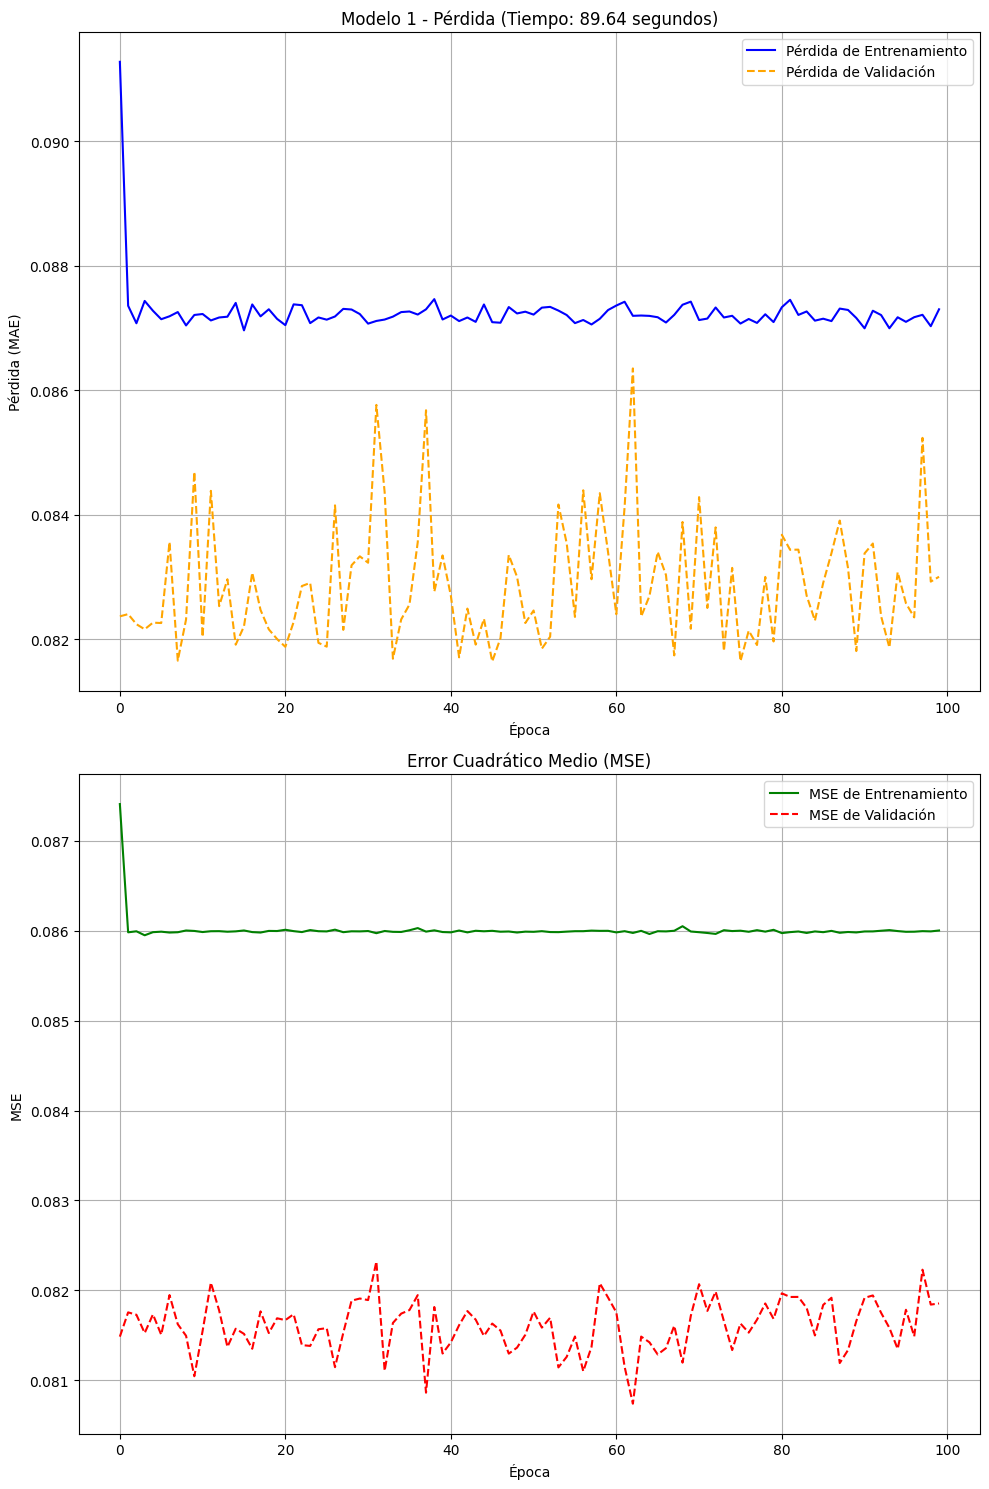

Tiempo de entrenamiento del Modelo 1: 89.64 segundos


In [20]:
# Graficar las métricas y la pérdida en subgráficas
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Pérdida (Loss)
axs[0].plot(history_1.history['loss'], label='Pérdida de Entrenamiento', color='blue')
axs[0].plot(history_1.history['val_loss'], label='Pérdida de Validación', color='orange', linestyle='--')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Pérdida (MAE)')
axs[0].set_title(f'Modelo 1 - Pérdida (Tiempo: {elapsed_time_1:.2f} segundos)')
axs[0].legend()
axs[0].grid(True)

# Error Cuadrático Medio (MSE)
axs[1].plot(history_1.history['mse'], label='MSE de Entrenamiento', color='green')
axs[1].plot(history_1.history['val_mse'], label='MSE de Validación', color='red', linestyle='--')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('MSE')
axs[1].set_title('Error Cuadrático Medio (MSE)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Tiempo de entrenamiento del Modelo 1: {elapsed_time_1:.2f} segundos")